In [33]:
import numpy as np
import pandas as pd

import shutil
import os
import cv2

import matplotlib.pyplot as plt
import seaborn as sns

from glob import glob
import scipy
import datetime as dt
import random
import re
import shutil


import tensorflow
from tensorflow.keras.preprocessing.image import ImageDataGenerator


from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#### Modeeling Part


##### Model Lawn Maintainance

In [66]:
from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import pickle
import cv2
import os
import matplotlib

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import shutil
import os

# matplotlib.use("Agg")
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
# from tensorflow.keras.applications import VGG19
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,classification_report

from matplotlib.image import imread

import tensorflow
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [76]:
task_dir = r'D:/Grass_Image_Classification/Augmentation_Required_For_Aviparnada/augmented_images_prop_preserv_label_2_ml_model/Lawn Maintenance/'

BASE_PATH = r'D:/Grass_Image_Classification/Augmentation_Required_For_Aviparnada/training_testing_validation_images_prop_preserv_label_2ml_model/Lawn Maintenance/'

TRAIN = "training"
TEST = "evaluation"
VAL = "validation"

trainPath = os.path.sep.join([BASE_PATH, TRAIN])
valPath = os.path.sep.join([BASE_PATH, VAL])
testPath = os.path.sep.join([BASE_PATH, TEST])

print('trainPath : ',trainPath)
print('valPath : ',valPath)
print('testPath : ',testPath)

totalTrain = len(list(paths.list_images(trainPath)))
totalVal = len(list(paths.list_images(valPath)))
totalTest = len(list(paths.list_images(testPath)))

print('totalTrain :',totalTrain)
print('totalVal :',totalVal)
print('totalTest :',totalTest)

CLASSES = os.listdir(task_dir)
print(len(CLASSES))
BATCH_SIZE = 16



trainPath :  D:/Grass_Image_Classification/Augmentation_Required_For_Aviparnada/training_testing_validation_images_prop_preserv_label_2ml_model/Lawn Maintenance/\training
valPath :  D:/Grass_Image_Classification/Augmentation_Required_For_Aviparnada/training_testing_validation_images_prop_preserv_label_2ml_model/Lawn Maintenance/\validation
testPath :  D:/Grass_Image_Classification/Augmentation_Required_For_Aviparnada/training_testing_validation_images_prop_preserv_label_2ml_model/Lawn Maintenance/\evaluation
totalTrain : 1598
totalVal : 425
totalTest : 111
4


In [77]:
trainAug = ImageDataGenerator()
testAug = ImageDataGenerator()
valAug = ImageDataGenerator()

mean = np.array([123.68, 116.779, 103.939], dtype="float32")

trainAug.mean = mean
valAug.mean = mean

trainGen = trainAug.flow_from_directory(
    trainPath,
    class_mode="categorical",
    target_size=(147, 199),
    color_mode="rgb",
    shuffle=True,
    batch_size=BATCH_SIZE)

# initialize the validation generator
valGen = valAug.flow_from_directory(
    valPath,
    class_mode="categorical",
    target_size=(147, 199),
    color_mode="rgb",
    shuffle=False,
    batch_size=BATCH_SIZE)


# initialize the testing generator

testGen = testAug.flow_from_directory(
    testPath,
    class_mode="categorical",
    target_size=(147, 199),
    color_mode="rgb",
    shuffle=False,
    batch_size=BATCH_SIZE)

Found 1598 images belonging to 4 classes.


Found 425 images belonging to 4 classes.
Found 111 images belonging to 4 classes.


In [78]:
LABEL = valGen.class_indices
LE_PATH =os.path.sep.join(['D:/Grass_Image_Classification/Augmentation_Required_For_Aviparnada/after_training_testing_validation_images_prop_preserv_label_2_ml_model_output_result', "pp_label_2_segregation_lawnmaintenance_le.cpickle"])
print(LE_PATH)
l = open(LE_PATH, "wb")
l.write(pickle.dumps(LABEL))
l.close()

D:/Grass_Image_Classification/Augmentation_Required_For_Aviparnada/after_training_testing_validation_images_prop_preserv_label_2_ml_model_output_result\pp_label_2_segregation_lawnmaintenance_le.cpickle


In [79]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor="val_loss",patience=10,mode='min')

In [80]:
baseModel = VGG16(weights="imagenet", include_top=False, 
                  input_tensor=Input(shape=(147, 199, 3)))

headModel = baseModel.output
headModel = Flatten(name="flatten")(headModel)
# headModel = Dense(512, activation="relu")(headModel)
# headModel = Dropout(0.5)(headModel)
headModel = Dense(len(CLASSES), activation="softmax")(headModel)

model = Model(inputs=baseModel.input, outputs=headModel)

for layer in baseModel.layers:
    layer.trainable = False
    
print("[INFO] compiling model...")
opt = SGD(lr=1e-4, momentum=0.9)
model.compile(loss="CategoricalCrossentropy", optimizer=opt, 
              metrics=["accuracy"])

print("[INFO] training head...")
H = model.fit(
    x=trainGen,
    steps_per_epoch=totalTrain // BATCH_SIZE,
    validation_data=valGen,
    validation_steps=totalVal // BATCH_SIZE,
    epochs=30,callbacks=[early_stop])

[INFO] compiling model...
[INFO] training head...
Epoch 1/30
99/99 [==============================] - 175s 2s/step - loss: 133.8039 - accuracy: 0.8578 - val_loss: 73.5294 - val_accuracy: 0.9279
Epoch 2/30
99/99 [==============================] - 171s 2s/step - loss: 18.6826 - accuracy: 0.9772 - val_loss: 31.2318 - val_accuracy: 0.9615
Epoch 3/30
99/99 [==============================] - 174s 2s/step - loss: 6.7515 - accuracy: 0.9899 - val_loss: 30.9889 - val_accuracy: 0.9663
Epoch 4/30
99/99 [==============================] - 174s 2s/step - loss: 2.4693 - accuracy: 0.9949 - val_loss: 45.5810 - val_accuracy: 0.9495
Epoch 5/30
99/99 [==============================] - 180s 2s/step - loss: 4.3669 - accuracy: 0.9924 - val_loss: 25.6219 - val_accuracy: 0.9591
Epoch 6/30
99/99 [==============================] - 179s 2s/step - loss: 1.5848 - accuracy: 0.9981 - val_loss: 25.8636 - val_accuracy: 0.9688
Epoch 7/30
99/99 [==============================] - 173s 2s/step - loss: 0.1328 - accuracy: 0.9

In [81]:
print('totalTest :',totalTest)

print("[INFO] evaluating after fine-tuning network head...")
testGen.reset()
predIdxs = model.predict(x=testGen,
                         steps=(totalTest // BATCH_SIZE) + 1)
predIdxs = np.argmax(predIdxs, axis=1)
print(classification_report(testGen.classes, predIdxs,
                            target_names=testGen.class_indices.keys()))

totalTest : 111
[INFO] evaluating after fine-tuning network head...
7/7 [==============================] - 10s 1s/step
                          precision    recall  f1-score   support

Initial Grass Cut - 2501       1.00      0.95      0.97        41
     Remove Vines - 2575       0.91      1.00      0.95        20
      Trim Shrubs - 2606       0.93      0.96      0.95        28
       Trim Trees - 9164       1.00      0.95      0.98        22

                accuracy                           0.96       111
               macro avg       0.96      0.97      0.96       111
            weighted avg       0.97      0.96      0.96       111



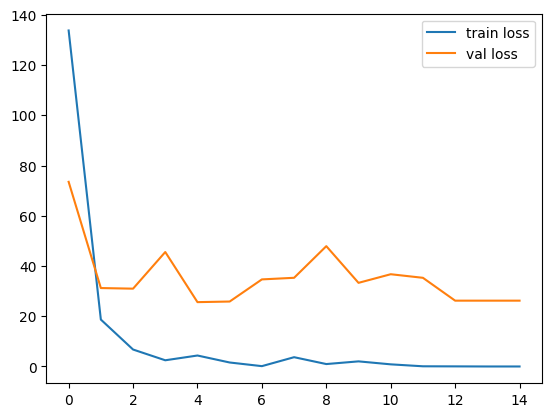

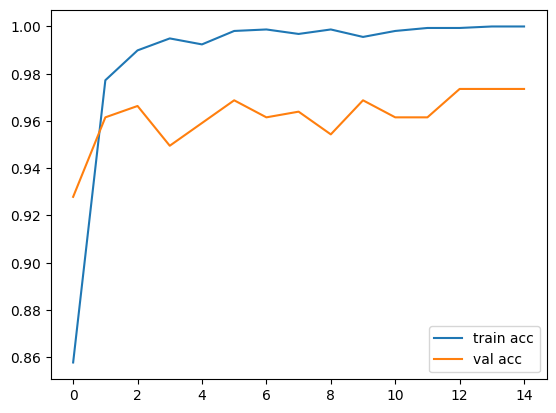

In [82]:
# plot some data
import matplotlib.pyplot as plt
# loss
plt.plot(H.history['loss'], label='train loss')
plt.plot(H.history['val_loss'], label='val loss')
plt.legend()
plt.show()

# accuracies
plt.plot(H.history['accuracy'], label='train acc')
plt.plot(H.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()

In [83]:
print("[INFO] serializing network...")
MODEL_PATH = os.path.sep.join(['D:/Grass_Image_Classification/Augmentation_Required_For_Aviparnada/after_training_testing_validation_images_prop_preserv_label_2_ml_model_output_result', "vgg16_pp_image_segregation_label_2_classification_lawnmaintenance_01_08_2023.h5"])
model.save(MODEL_PATH, save_format="h5")

[INFO] serializing network...


Found 111 images belonging to 4 classes.
1/1 [==============================] - 2s 2s/step
[[39  0  2  0]
 [ 0 20  0  0]
 [ 0  1 27  0]
 [ 0  1  0 21]]
Found 111 images belonging to 4 classes.
{'Initial Grass Cut - 2501': 0, 'Remove Vines - 2575': 1, 'Trim Shrubs - 2606': 2, 'Trim Trees - 9164': 3}


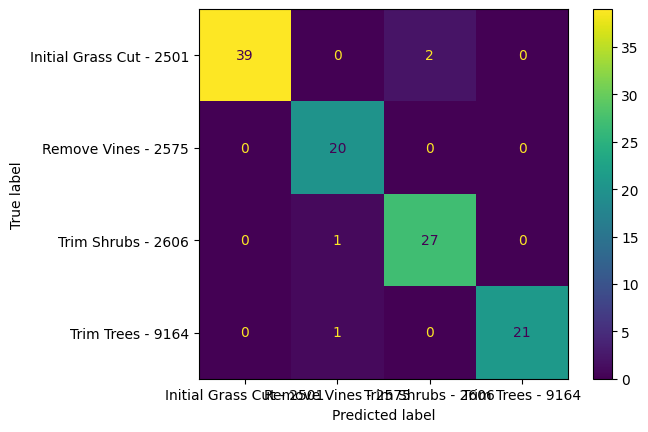

In [85]:
from tensorflow.keras.models import load_model

model = load_model('D:/Grass_Image_Classification/Augmentation_Required_For_Aviparnada/after_training_testing_validation_images_prop_preserv_label_2_ml_model_output_result/vgg16_pp_image_segregation_label_2_classification_lawnmaintenance_01_08_2023.h5')

predictions = []
targets = []
i = 0
for x, y in testAug.flow_from_directory(testPath,class_mode="categorical",target_size=(147, 199),color_mode="rgb",shuffle=False,batch_size=BATCH_SIZE*2):
  i += 1
  if i % 50 == 0:
    print(i)
  p = model.predict(x)
  p = np.argmax(p, axis=1)
  y = np.argmax(y, axis=1)
  predictions = np.concatenate((predictions, p))
  targets = np.concatenate((targets, y))
  if len(targets) >= totalTest:
    break
cm = confusion_matrix(targets, predictions)
print(cm)

# get label mapping for confusion matrix plot later
testGen = testAug.flow_from_directory(testPath,class_mode="categorical",target_size=(147, 199),color_mode="rgb",shuffle=False,batch_size=BATCH_SIZE*2)
print(testGen.class_indices)
labels = [None] * len(testGen.class_indices)

for k, v in testGen.class_indices.items():
  labels[v] = k

from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=labels).plot()